In [1]:
"""
Ce fichier analyse comment l'evolutin de la distance meandre d'une valeur assez 
grandre a une valuer tres petite influence la frequence de raisonnance

Dans ce code, On ne touche Ni a la distance short feed ni a la largeur de la piste meandree
"""

"\nCe fichier analyse comment l'evolutin de la distance meandre d'une valeur assez \ngrandre a une valuer tres petite influence la frequence de raisonnance\n\nDans ce code, On ne touche Ni a la distance short feed ni a la largeur de la piste meandree\n"

In [2]:
from utils.ifa_meander_project_v2.geometry import *
from utils.ifa_meander_project_v2.meshing import *
from utils.ifa_meander_project_v2.frequency import *
from utils.ifa_meander_project_v2.simulation import *

In [3]:
fC      = 868e6  # fréquence centrale en Hz
delta_f = 4e6  # écart entre les échantillons en Hz
print(f"delta_f = {delta_f/1e6:.2f} MHz")
nPoints = 31     # nombre d'échantillons

fLow, fHigh, frequencies = calc_frequencies(fC, delta_f, nPoints)
print(f"fLow = {fLow/1e6:.2f} MHz, fHigh = {fHigh/1e6:.2f} MHz, nPoints = {nPoints}")

delta_f = 4.00 MHz
fLow = 808.00 MHz, fHigh = 928.00 MHz, nPoints = 31


In [4]:
mesh_name = "ifa_meander_anlyse.msh"
save_mesh_folder = 'data/gmsh_files/'
ifa_meander_mat = 'data/antennas_mesh/ifa_meander_anlyse.mat'
ifa_meander_msh = save_mesh_folder + mesh_name

In [5]:
a = 15 / 1000  # Largeur
b = 30 / 1000  # Hauteur

terminal_a = 50 / 1000
terminal_b = 30 / 1000
x_t = np.array([-terminal_a, 0, 0, -terminal_a])
y_t = np.array([terminal_b, terminal_b, 0, 0])

# On fixe le short feed et la largur de piste
largeur_piste = 0.5 / 1000        # Valuer Minimale possible
feed          = 15 / 1000         # Valuer Positionné a la moitié du ground plane
feed_point    = [0, feed, 0]      # On alimente au short feed

In [6]:
distance_meandre_list = np.linspace(a - largeur_piste, largeur_piste/2, 200)
print(f"Min distance: {distance_meandre_list[-1]*1000:.2f} mm")
print(f"Max distance: {distance_meandre_list[0]*1000:.2f} mm")

np.save('data/analyse_dist_meandre/distance_meandre_list.npy', distance_meandre_list)

Min distance: 0.25 mm
Max distance: 14.50 mm


"""
La distance meandre doit etre toujours suprieur la moitié de la largueur de piste 
"""
if distance_meandre < largeur_piste / 2:
    raise ValueError(f"La distance meandre ({distance_meandre*1000:.2f} mm) doit être supérieure à la moitié de la largeur de piste ({largeur_piste*1000/2:.2f} mm)")

if distance_meandre > a - largeur_piste:
        raise ValueError(f"La distance meandre ({distance_meandre*1000:.2f} mm) doit être inférieure à la largeur du plan moins la largeur de piste ({(a-largeur_piste)*1000:.2f} mm)")


In [7]:
def creation_ifa(largeur, hauteur, width, dist_meandre, x_t, y_t, save_mesh_folder, mesh_name, mesh_size=2.25/1000):
    x, y, N, distance_meandre = ifa_creation(largeur, hauteur, width, dist_meandre)
    x_m, y_m = trace_meander(x, y, width)
    feed_wid = width                    # La largeur de la piste est la meme partout
    feed_x = np.array([0, distance_meandre, distance_meandre, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, mesh_size)
    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)
    return N, distance_meandre

In [ ]:
iteration = 1
New_distance_meandre_list = []
N_list = []
frequences_resonance = []
for distance_meandre in distance_meandre_list:
    try:
        print(f"\nIteration N°{iteration}")
        print(f"distance meandres {distance_meandre * 1000} mm")
        N_list_elem, new_distance_meandre_elem = creation_ifa(a, b, largeur_piste, distance_meandre, x_t, y_t, save_mesh_folder, mesh_name)
        print(f"Number of meanders {N_list_elem}")
        print(f"New distance meandres {new_distance_meandre_elem * 1000} mm")

        if len(N_list) == 0 or N_list_elem != N_list[-1]:
            New_distance_meandre_list.append(new_distance_meandre_elem)
            N_list.append(N_list_elem)
            frequence_resonance = analysis(frequencies, ifa_meander_mat, feed_point)
            frequences_resonance.append(frequence_resonance)

        iteration += 1
    except ValueError as e:
        print(f"Error: {e}")

np.save(f'data/analyse_dist_meandre/New_distance_meandre_list.npy', New_distance_meandre_list)
np.save(f'data/analyse_dist_meandre/N_list.npy', N_list)
np.save(f'data/frequences_resonance.npy', frequences_resonance)


Iteration N°1
distance meandres 14.499999999999998 mm
Number of meanders 1
New distance meandres 14.499999999999998 mm
Simulation 1/31 | f = 808.00 MHz | S11 = -0.02 dB
Simulation 2/31 | f = 812.00 MHz | S11 = -0.02 dB
Simulation 3/31 | f = 816.00 MHz | S11 = -0.02 dB
Simulation 4/31 | f = 820.00 MHz | S11 = -0.02 dB
Simulation 5/31 | f = 824.00 MHz | S11 = -0.02 dB
Simulation 6/31 | f = 828.00 MHz | S11 = -0.02 dB
Simulation 7/31 | f = 832.00 MHz | S11 = -0.02 dB
Simulation 8/31 | f = 836.00 MHz | S11 = -0.02 dB
Simulation 9/31 | f = 840.00 MHz | S11 = -0.02 dB
Simulation 10/31 | f = 844.00 MHz | S11 = -0.02 dB
Simulation 11/31 | f = 848.00 MHz | S11 = -0.02 dB
Simulation 12/31 | f = 852.00 MHz | S11 = -0.02 dB
Simulation 13/31 | f = 856.00 MHz | S11 = -0.02 dB
Simulation 14/31 | f = 860.00 MHz | S11 = -0.03 dB
Simulation 15/31 | f = 864.00 MHz | S11 = -0.03 dB
Simulation 16/31 | f = 868.00 MHz | S11 = -0.03 dB
Simulation 17/31 | f = 872.00 MHz | S11 = -0.03 dB
Simulation 18/31 | f =

In [ ]:
# Charger et afficher la liste N_list.npy
loaded_N_list = np.load('data/analyse_dist_meandre/N_list.npy')
print("Contenu de N_list.npy :", loaded_N_list)

# Charger et afficher la liste N_list.npy
loaded_New_distance_meandre_list = np.load('data/analyse_dist_meandre/New_distance_meandre_list.npy')
print("\nContenu de New_distance_meandre_list.npy :", loaded_New_distance_meandre_list * 1000)

# Charger et afficher la liste N_list.npy
loaded_frequences_resonance = np.load('data/analyse_dist_meandre/frequences_resonance.npy')
print("\nContenu de frequences_resonance.npy :", loaded_frequences_resonance * 1e-6)

Contenu de N_list.npy : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 20]

Contenu de New_distance_meandre_list.npy : [14.5         7.          4.5         3.25        2.5         2.
  1.64285714  1.375       1.16666667  1.          0.86363636  0.75
  0.65384615  0.57142857  0.5         0.4375      0.33333333  0.25      ]

Contenu de frequences_resonance.npy : [928. 928. 928. 928. 880. 816. 808. 808. 808. 808. 808. 808. 808. 808.
 808. 808. 808. 808.]


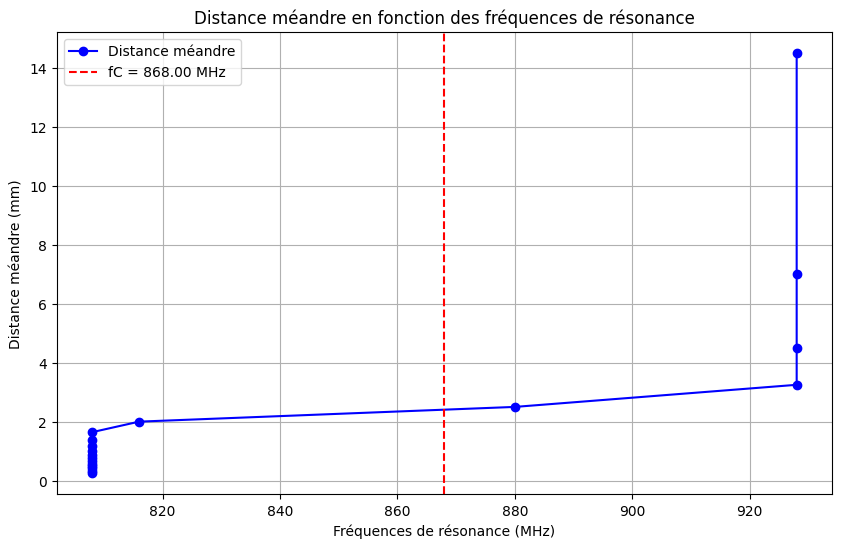

In [21]:
import matplotlib.pyplot as plt

# Conversion des fréquences de résonance en MHz
frequences_resonance_mhz = loaded_frequences_resonance * 1e-6
fC_mhz = fC * 1e-6

# Trouver l'indice de la fréquence centrale dans les fréquences de résonance
index_fC = np.where(frequences_resonance_mhz == fC_mhz)[0]
if len(index_fC) > 0:
    distance_meandre_fC = loaded_New_distance_meandre_list[index_fC[0]] * 1000
else:
    distance_meandre_fC = None

# Tracé
plt.figure(figsize=(10, 6))
plt.plot(frequences_resonance_mhz, loaded_New_distance_meandre_list * 1000, marker='o', linestyle='-', color='b', label='Distance méandre')
plt.axvline(x=fC_mhz, color='r', linestyle='--', label=f'fC = {fC_mhz:.2f} MHz')  # Ligne verticale pour fC

# Ajouter une annotation pour la distance méandre à fC_mhz
if distance_meandre_fC is not None:
    plt.scatter([fC_mhz], [distance_meandre_fC], color='g', label=f'Distance méandre à fC = {distance_meandre_fC:.2f} mm')

plt.xlabel('Fréquences de résonance (MHz)')
plt.ylabel('Distance méandre (mm)')
plt.title('Distance méandre en fonction des fréquences de résonance')
plt.legend()
plt.grid(True)
plt.show()

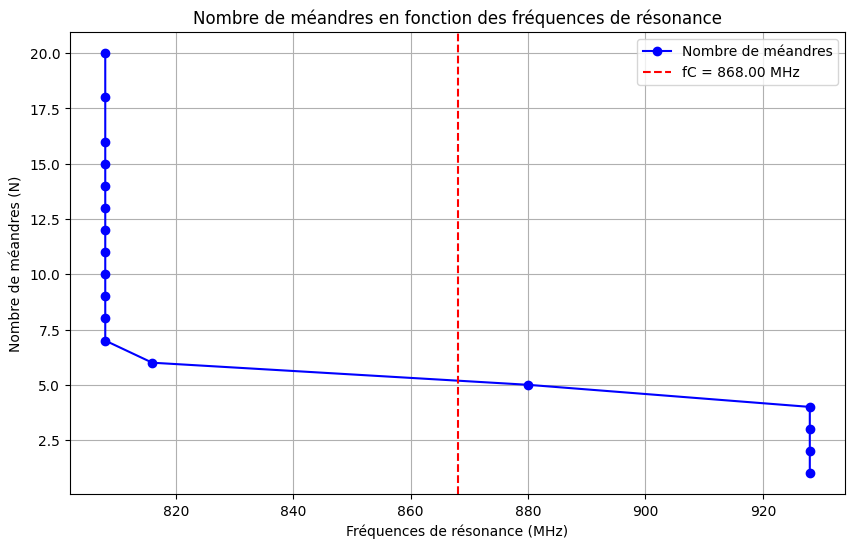

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(frequences_resonance_mhz, loaded_N_list, marker='o', linestyle='-', color='b', label='Nombre de méandres')
plt.axvline(x=fC_mhz, color='r', linestyle='--', label=f'fC = {fC_mhz:.2f} MHz')

# Si nous avons une valeur à fC_mhz, l'afficher
if len(index_fC) > 0:
    N_at_fC = loaded_N_list[index_fC[0]]
    plt.scatter([fC_mhz], [N_at_fC], color='g', label=f'N à fC = {N_at_fC}')

plt.xlabel('Fréquences de résonance (MHz)')
plt.ylabel('Nombre de méandres (N)')
plt.title('Nombre de méandres en fonction des fréquences de résonance')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
"""
L'analyse que je fait dans un premier temps, c'est que pas besoin de modifier la distance meandre, il suffit juste de modifier le nombre de meandre
car c'est lui qui fixe veritablement la distance entre les meandres. 

En suite, on peux esperer eteindre la frequence de resonnance autour de 5 comme nombre de meandre.

Maintenant je vais fixer le nombre de meandre a 5 et modifier la taille du wid d'une valuer minimale de 0.5 mm à 2*distance_meandre pour 5 meandres
"""

"\nL'analyse que je fait dans un premier temps, c'est que pas besoin de modifier la distance meandre, il suffit juste de modifier le nombre de meandre\ncar c'est lui qui fixe veritablement la distance entre les meandres. \n"